# Computer Vision CSCI-GA.2272-001 Assignment 1, part 1.

Fall 2021 semester.

Due date: **September 30th 2021.**

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch by modifying this ipython notebook (File-->Save a copy...).

To install PyTorch, follow instructions at http://pytorch.org/

Please submit your assignment by uploading this iPython notebook to Brightspace.

## Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [10%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [25%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may find training is faster if you use a GPU runtime (RunTime-->Change Runtime Type-->GPU). 

- Give a breakdown of the parameters within the above model, and the overall number.

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
# options
# dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

# **Data Loading**

In [ ]:
# Data Loading
# Fetch MNIST data
data_transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,))
])
coco_train = datasets.CocoCaptions(root='.', annFile='.', transform=data_transform)
'''
m_trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
m_testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

m_train_loader = torch.utils.data.DataLoader(m_trainset, batch_size=batch_size, shuffle=True, num_workers=0)
m_test_loader  = torch.utils.data.DataLoader(m_testset, batch_size=batch_size, shuffle=False, num_workers=0)

mnist_class = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
'''

loading annotations into memory...


IsADirectoryError: ignored

In [ ]:
# Data Loading
# Fetch CIFAR10 data
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
c_trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
c_testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

c_train_loader = torch.utils.data.DataLoader(c_trainset, batch_size=batch_size, shuffle=True, num_workers=0)
c_test_loader  = torch.utils.data.DataLoader(c_testset, batch_size=batch_size, shuffle=False, num_workers=0)

cifar10_class = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


# **Warm Up**

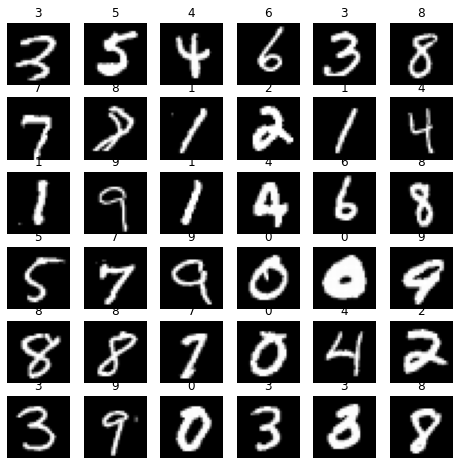

In [ ]:
# Visualize MNIST data

import numpy as np
import matplotlib.pyplot as plt

# code referenced from https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
figure = plt.figure(figsize=(8, 8))
cols, rows = 6, 6
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(m_trainset), size=(1,)).item()
    img, label = m_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(mnist_class[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

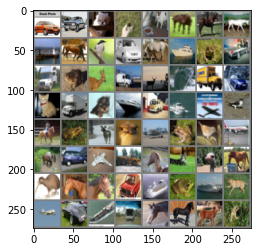

automobile automobile   dog   cat   cat horse horse horse  ship horse  bird automobile horse  ship  frog automobile truck  frog  deer truck  deer   cat truck automobile   cat truck   dog  ship truck  ship airplane  bird horse  frog  deer  bird airplane  frog  bird airplane horse automobile airplane truck horse   cat  bird horse  bird horse horse automobile  ship  frog  ship   dog airplane automobile  ship truck horse horse  deer  frog


In [ ]:
# Visualize CIFAR10 data

import torchvision as tv

# imshow function referenced from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
def imshow(img):
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()   # convert from tensor
  plt.imshow(np.transpose(npimg, (1, 2, 0))) 
  plt.show()

# get some random training images
dataiter = iter(c_train_loader)
images, labels = dataiter.next()

# show images
imshow(tv.utils.make_grid(images))
# print labels
print(' '.join('%5s' %  cifar10_class[labels[j]] for j in range(batch_size)))

# **Training a Single Layer Network on MNIST**

In [ ]:
## network and optimizer
def get_num_inputs(name):
  if name == 'mnist':
    # flattening 28x28 2D image to 1D vector
    # yields 784 input units
      return 784
  elif name == 'cifar10':
      return 3072

In [ ]:
num_inputs = get_num_inputs('mnist')
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(m_train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(m_train_loader.dataset),
                100. * batch_idx / len(m_train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in m_test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(m_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(m_test_loader.dataset),
        100. * correct / len(m_test_loader.dataset)))

In [ ]:
for epoch in range(1, epochs + 1):
  train(epoch)
  test()
  print('\n')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.494842
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.720674
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.439566
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.436312
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.396136
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.264275
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.347212
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.299937
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.310077
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.336559

Test set: Average loss: 0.3318, Accuracy: 9070/10000 (91%)



Train Epoch: 2 [0/60000 (0%)]	Loss: 0.202655
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.402171
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.449753
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.503610
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.439305
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.461085
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.618296
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.358657
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.251792

In [ ]:
# network.linear.weight refers to weights used for
# 1st layer of network (self.linear) as defined in
# the Net class
weight_tensor = network.linear.weight
print(weight_tensor.shape)
# 784 is 28 times 28
# weight tensor is 1D vectors of flattened 2D images

torch.Size([10, 784])


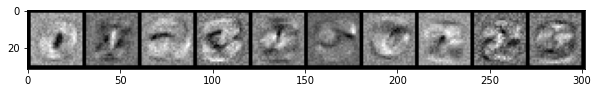

In [ ]:
# reshape tensor to 10 images per batch, 1 color channel, 28x28 images
weight_tensor_reshape = weight_tensor.reshape(10, 1, 28, 28)

# plot_weights function referenced from https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/35
def plot_weights(tensor):
  # make_grid returns tensor containing grid of images
  # nrow is the number of images displayed in each row of grid
  grid = tv.utils.make_grid(tensor, nrow=10, normalize=True, scale_each=True)
  plt.figure(figsize=(10, 10))
  # transpose the grid
  plt.imshow(grid.permute(1, 2, 0))

plot_weights(weight_tensor_reshape)

In [ ]:
# define new network to be trained w/only 50 training examples
network_50 = Net(num_inputs, num_outputs)
optimizer_50 = optim.SGD(network_50.parameters(), lr=lr)

def train_50(epoch):
    network_50.train()
    for batch_idx, (data, target) in enumerate(m_train_loader):
        data, target = Variable(data[:50]), Variable(target[:50])
        optimizer_50.zero_grad()
        output = network_50(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer_50.step()
        # to limit "batch size" to 50, only run one batch per epoch
        if batch_idx == 0:
            break

def test_50():
    network_50.eval()
    test_loss = 0
    correct = 0
    for data, target in m_test_loader:
        output = network_50(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(m_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(m_test_loader.dataset),
        100. * correct / len(m_test_loader.dataset)))

for epoch in range(1, epochs + 1):
  train_50(epoch)
  test_50()
  print('\n')


Test set: Average loss: 2.2276, Accuracy: 2332/10000 (23%)




Test set: Average loss: 2.1317, Accuracy: 2802/10000 (28%)




Test set: Average loss: 2.0329, Accuracy: 3386/10000 (34%)




Test set: Average loss: 1.9440, Accuracy: 3914/10000 (39%)




Test set: Average loss: 1.8653, Accuracy: 4350/10000 (44%)




Test set: Average loss: 1.8020, Accuracy: 4641/10000 (46%)




Test set: Average loss: 1.7512, Accuracy: 4557/10000 (46%)




Test set: Average loss: 1.6744, Accuracy: 5080/10000 (51%)




Test set: Average loss: 1.6162, Accuracy: 5266/10000 (53%)




Test set: Average loss: 1.5607, Accuracy: 5556/10000 (56%)





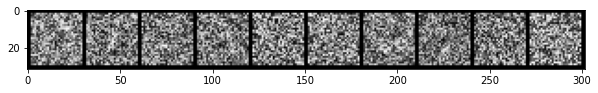

In [ ]:
weight_tensor_50 = network_50.linear.weight
weight_tensor_50_reshape = weight_tensor_50.reshape(10, 1, 28, 28)
plot_weights(weight_tensor_50_reshape)

**b. explain what is happening to the model when only trained on 50 training examples**

There is not enough training examples for the model to learn the correct weights so the weights for each output is very noisy. 

# **Training a Multi-Layer Network on MNIST**

In [ ]:
num_inputs = get_num_inputs('mnist')
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hidden = 1000

class Multi_Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Multi_Net, self).__init__()
        self.hidden = nn.Linear(num_inputs, num_hidden)
        self.output = nn.Linear(num_hidden, num_outputs)
        self.tanh = nn.Tanh()

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.tanh(self.hidden(input))
        output = self.output(output)
        return output

# define new variables to train multi-layer network
multi_network = Multi_Net(num_inputs, num_outputs)
multi_optimizer = optim.SGD(multi_network.parameters(), lr=lr)

In [ ]:
def train_multi(epoch):
    multi_network.train()
    for batch_idx, (data, target) in enumerate(m_train_loader):
        data, target = Variable(data), Variable(target)
        multi_optimizer.zero_grad()
        output = multi_network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        multi_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(m_train_loader.dataset),
                100. * batch_idx / len(m_train_loader), loss.item()))

def test_multi():
    multi_network.eval()
    test_loss = 0
    correct = 0
    for data, target in m_test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = multi_network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(m_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(m_test_loader.dataset),
        100. * correct / len(m_test_loader.dataset)))


for epoch in range(1, epochs + 1):
  train_multi(epoch)
  test_multi()
  print('\n')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.363468
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.888709
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.379421
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.504817
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.574762
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.287564
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.495966
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.269903
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.369953
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.166169

Test set: Average loss: 0.3220, Accuracy: 9107/10000 (91%)



Train Epoch: 2 [0/60000 (0%)]	Loss: 0.304987
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.375882
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.226513
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.435149
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.359629
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.215913
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.238318
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.177684
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.236445

### **train multi-layer network with learning rate = 10**

In [ ]:
# define new variables to train multi-layer network
multi_network_10 = Multi_Net(num_inputs, num_outputs)
multi_optimizer_10 = optim.SGD(multi_network_10.parameters(), lr=10)

def train_multi_10(epoch):
    multi_network_10.train()
    for batch_idx, (data, target) in enumerate(m_train_loader):
        data, target = Variable(data), Variable(target)
        multi_optimizer_10.zero_grad()
        output = multi_network_10(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        multi_optimizer_10.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(m_train_loader.dataset),
                100. * batch_idx / len(m_train_loader), loss.item()))

def test_multi_10():
    multi_network_10.eval()
    test_loss = 0
    correct = 0
    for data, target in m_test_loader:
        output = multi_network_10(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(m_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(m_test_loader.dataset),
        100. * correct / len(m_test_loader.dataset)))


for epoch in range(1, epochs + 1):
  train_multi_10(epoch)
  test_multi_10()
  print('\n')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.363596
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1000.612000
Train Epoch: 1 [12800/60000 (21%)]	Loss: 872.140991
Train Epoch: 1 [19200/60000 (32%)]	Loss: 403.398346
Train Epoch: 1 [25600/60000 (43%)]	Loss: 395.809204
Train Epoch: 1 [32000/60000 (53%)]	Loss: 426.200470
Train Epoch: 1 [38400/60000 (64%)]	Loss: 584.405029
Train Epoch: 1 [44800/60000 (75%)]	Loss: 404.281769
Train Epoch: 1 [51200/60000 (85%)]	Loss: 128.229858
Train Epoch: 1 [57600/60000 (96%)]	Loss: 123.955093

Test set: Average loss: 537.8156, Accuracy: 5263/10000 (53%)



Train Epoch: 2 [0/60000 (0%)]	Loss: 553.439331
Train Epoch: 2 [6400/60000 (11%)]	Loss: 397.097778
Train Epoch: 2 [12800/60000 (21%)]	Loss: 243.990036
Train Epoch: 2 [19200/60000 (32%)]	Loss: 229.010864
Train Epoch: 2 [25600/60000 (43%)]	Loss: 160.568344
Train Epoch: 2 [32000/60000 (53%)]	Loss: 300.530060
Train Epoch: 2 [38400/60000 (64%)]	Loss: 263.992462
Train Epoch: 2 [44800/60000 (75%)]	Loss: 753.832275
Train Epoch:

The learning rate is too large, which makes the updates take big jumps around the local minimum. During gradient descent, the update keeps zig-zagging, which makes it difficult to converge and thus lead to low accuracy.

# **Training a Convolutional Network on CIFAR**

In [ ]:
num_inputs = get_num_inputs('cifar10')
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hidden = 64

class Conv_Net(nn.Module):
    def __init__(self):
        super(Conv_Net, self).__init__()
        # 3 input channels (RGB) in input image
        # 16 output channels aka features
        # 5x5 convolving kernel
        # nn.Conv2d wants DEPTH of inputs
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5)

        # max pooling layer used to reduce dimensionality
        # thus shorten training time and reduce overfitting
        self.pool = nn.MaxPool2d(2, 2)

        # 16 input channels after conv1
        # 128 output channels
        # 5x5 convolving kernel
        self.conv2 = nn.Conv2d(16, 128, kernel_size=5)

        # linear layer with hidden units
        # nn.Linear wants FEATURES of input
        self.fc1 = nn.Linear(128 * 5 * 5, num_hidden)

        # linear transformation of 64 hidden units to 10 outputs
        self.fc2 = nn.Linear(num_hidden, num_outputs)

        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.pool(self.tanh(self.conv1(x)))
        x = self.pool(self.tanh(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# define new variables to train multi-layer network
cnn = Conv_Net()
cnn_optimizer = optim.SGD(cnn.parameters(), lr=lr)

In [ ]:
def train_cnn(epoch):
    cnn.train()
    for batch_idx, (data, target) in enumerate(c_train_loader):
        data, target = Variable(data), Variable(target)
        cnn_optimizer.zero_grad()
        output = cnn(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        cnn_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(c_train_loader.dataset),
                100. * batch_idx / len(c_train_loader), loss.item()))

def test_cnn():
    cnn.eval()
    test_loss = 0
    correct = 0
    for data, target in c_test_loader:
        output = cnn(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(c_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(c_test_loader.dataset),
        100. * correct / len(c_test_loader.dataset)))

epochs = 20

for epoch in range(1, epochs + 1):
  train_cnn(epoch)
  test_cnn()
  print('\n')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.312151
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.168933
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.124271
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.828185
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.933493
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.744148
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.798609
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.828993

Test set: Average loss: 1.7642, Accuracy: 3840/10000 (38%)



Train Epoch: 2 [0/50000 (0%)]	Loss: 1.762162
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.842256
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.735928
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.647154
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.739808
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.605905
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.702152
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.661248

Test set: Average loss: 1.5819, Accuracy: 4361/10000 (44%)



Train Epoch: 3 [0/50000 (0%)]	Loss: 1.600984
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1

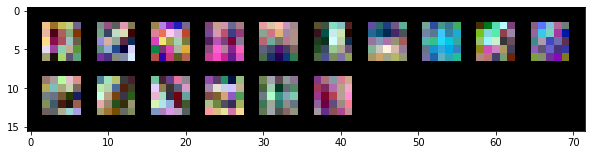

In [ ]:
import torchvision as tv
import matplotlib.pyplot as plt


cnn_first_weights = cnn.conv1.weight.data

def print_weights(tensor):
  # make_grid returns tensor containing grid of images
  # nrow is the number of images displayed in each row of grid
  grid = tv.utils.make_grid(tensor, nrow=10, normalize=True, scale_each=True)
  plt.figure(figsize=(10, 10))
  # transpose the grid
  plt.imshow(grid.permute(1, 2, 0))

print_weights(cnn_first_weights)

In [ ]:
from torchsummary import summary

# summary(model, input_size=(channels, H, W) )
summary(cnn.cpu(), input_size=(3,32,32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
              Tanh-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4          [-1, 128, 10, 10]          51,328
              Tanh-5          [-1, 128, 10, 10]               0
         MaxPool2d-6            [-1, 128, 5, 5]               0
            Linear-7                   [-1, 64]         204,864
              Tanh-8                   [-1, 64]               0
            Linear-9                   [-1, 10]             650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.44
Params size (MB): 0.98
Estimated Total Size (MB): 1.43
-------------------------------------------